In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Cargar los datos del archivo CSV
df_train = pd.read_csv(r"mitbih_train.csv")

# Renombrar las columnas para mayor claridad
df_train.columns = [f'Feature {i + 1}' for i in range(len(df_train.columns) - 1)] + ['Target']

# Separar los datos predictivos (X) y la variable objetivo (y)
X = df_train.iloc[:, :-1]  # Todas las columnas excepto la última (predictores)
y = df_train.iloc[:, -1]   # Última columna (objetivo)

----- KNN classifier - K parameter -----
---- k = 1
ACC: 0.9761515661152014
---- k = 2
ACC: 0.9746553343756087
---- k = 3
ACC: 0.9752492422075824
---- k = 4
ACC: 0.9736844873326096
---- k = 5
ACC: 0.9736387991544257
---- k = 6
ACC: 0.9722453638589121
---- k = 7
ACC: 0.9719141297853049
---- k = 8
ACC: 0.9709661340064584
---- k = 9
ACC: 0.9704064727397752
---- k = 10
ACC: 0.9696297932789968
---- k = 11
ACC: 0.969447047741322
---- k = 12
ACC: 0.9688074249877561
---- k = 13
ACC: 0.9685789906196189
---- k = 14
ACC: 0.9678822706888883
---- k = 15
ACC: 0.96776805350482
---- k = 16
ACC: 0.9671170197954384
---- k = 17
ACC: 0.9668200603350865
---- k = 18
ACC: 0.9663175021160721
---- k = 19
ACC: 0.9659976953052372
---- k = 20
ACC: 0.965597942009919
---- k = 21
ACC: 0.9651867705837247
---- k = 22
ACC: 0.9646499397082902
---- k = 23
ACC: 0.9644671928660588
---- k = 24
ACC: 0.9641016985293179
---- k = 25
ACC: 0.9638390025934911
---- k = 26
ACC: 0.9634506667767712
---- k = 27
ACC: 0.9632565031082201


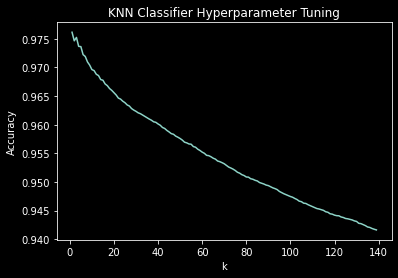

KNeighborsClassifier(n_neighbors=np.int64(1))

In [3]:
# Convertir a matrices numpy
X_resampled = X.to_numpy()
y_resampled = y.to_numpy()

# Crear un objeto imputer para reemplazar NaN con la media de la columna
imputer = SimpleImputer(strategy='mean')

# Ajustar el imputer en los datos y transformarlos
X_resampled = imputer.fit_transform(X_resampled)

# Parámetro K del clasificador KNN
print("----- KNN classifier - K parameter -----")

kk = np.arange(1, 140)
acc_knn = []

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Diccionario para almacenar k y su accuracy
results = {}

for k in kk:
    print('---- k =', k)
    
    acc_cv = []

    for train_index, test_index in kf.split(X_resampled, y_resampled):
        # Fase de entrenamiento
        x_train = X_resampled[train_index, :]
        y_train = y_resampled[train_index]     

        clf_cv = KNeighborsClassifier(n_neighbors=k)             

        clf_cv.fit(x_train, y_train)

        # Fase de prueba
        x_test = X_resampled[test_index, :]
        y_test = y_resampled[test_index]
        y_pred = clf_cv.predict(x_test)    
        
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)    

    acc_hyp = np.mean(acc_cv)
    acc_knn.append(acc_hyp)
    results[k] = acc_hyp  # Almacenar k y su accuracy
    
    print('ACC:', acc_hyp)

# Encontrar los mejores hiperparámetros y sus accuracies
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\nTop 5 Hyperparameters with Best Accuracy:")
for k, acc in sorted_results[:5]:
    print(f"k = {k}, Accuracy = {acc:.4f}")

# Visualizar los resultados
opt_index_knn = np.argmax(acc_knn)
opt_k = kk[opt_index_knn]
print("Optimal k for KNN: ", opt_k)

plt.plot(kk, acc_knn)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Classifier Hyperparameter Tuning")
plt.show()

# Entrenar el modelo con el hiperparámetro óptimo
clf_knn = KNeighborsClassifier(n_neighbors=opt_k)   
clf_knn.fit(X_resampled, y_resampled)